In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/pytorch_dataset

/content/drive/My Drive/Colab Notebooks/pytorch_dataset


Pytorch is a Python-based machine learning library. There are 2 major features in pytorch.


*   It has the ability to efficiently perfomr tensor operations with hardware acceleration (GPU)
*  It has the ability to build deep neural network

Pytorch is a very popular library. 


In [3]:
# conda install torch torchvision -c pytorch
# Checking that pytorch is working properly
import torch
x= torch.tensor([3.,4.])

In [4]:
print(x)

tensor([3., 4.])


That means our pytorch is installed and working properly

In [5]:
# Perform some basic operations such as multiplication
x= torch.tensor([3.,4.])
y= torch.tensor([5.,6.])

In [6]:
print(x*y)

tensor([15., 24.])


Tensors have a property known as order, which will determine the dimensionality of a tensor. 

An order one tensor is a tensor with a single dimension  which is equivalent to a vector or a list of numbers.

An order 2 tensor with 2 dimensions is the same as a matrix and tensor of order 3 will have 3 dimension.

**A Neural Network with Pytorch**

In [16]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torch
from torch.autograd import Variable


In [17]:
# load dataset

train= pd.read_csv("train.csv")
train_labels = train['label'].values

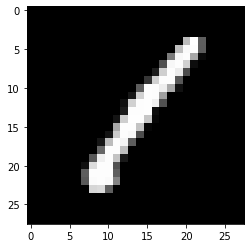

In [18]:
plt.imshow(np.reshape(train.values[0][1:],(28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [19]:
# We need to reshape our input to (1,1,28,28). This is a tensor of 1000 x 1000 images. Each image has 28x28 pixel
train = train.drop("label", axis=1).values.reshape(len(train),1,28,28)

In [20]:
# training data and lables will be converted into tensor. It will help to feed them into neural network
X = torch.Tensor(train.astype(float))
y = torch.Tensor(train_labels).long()

There are 2 tensors:


*   The float tensor which has 32 bit floating points numbers
*   The long tensor which has 64 bit integers


The X variable has to be float as it will help Pytorch to compute gradients.

The y variable which is our lables has to be integers because we will predict values of 1,2,3, and ...

In [21]:
# Our neural network
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 392)  # Our first layer has 784 inputs as the size of each image is 28x28
    self.fc2 = nn.Linear(392, 196) # Second layer has 392 units as input
    self.fc3 = nn.Linear(196, 98) # Third layer has 192
    self.fc4 = nn.Linear(98, 10) # Output is the final layer and it has 10 units. The reason for that is we try to predict whether the image is a digit between 0 and 9
    self.dropout = nn.Dropout(p=0.2) # Dropout is a way of regularizing our neural networks to prevent overfitting.
  # define the forward pass
  def forward(self, x): # The forward function willl define the path our input will take throughout the network
    x = x.view(x.shape[0], -1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.log_softmax(self.fc4(x), dim=1)
    # It will take our input x and reshape it for use within the neural netowrk, transform it into a 1-dimensional vector and then pass it through our fullly connected layer
    # And then wrap it with ReLu activation function to make it non-linear
    # After that, we will wrap it in our dropout which was defined in the init function.
    # For the prediction layer we willl use the softmax layer because it will help us to calcualte the loss function much more easier.
    return x

In [22]:
# Setting the model parameters
model = Classifier()
loss_function = nn.NLLLoss()
opt = optim.Adam(model.parameters(), lr=0.001)


In [24]:
# Train our network
# first we need to create a loop that runs once for each epoch of our training. Here we will run our training loop for 50 epochs. We will first take our input tensor of images
# and our ouput tensor of labels and transform them into Pytorch variable

# A vraible is a pytorch object that contains a backward() method which we can use to perform
for epoch in range(50):
  images = Variable(X)
  labels = Variable(y)
  # Next we will call zero_grad on our optimizer to set our calculated gradients to zero
  # Within pytorch, gradients are calculated cumulatively on each back probagation.
  # While this is useful in some models, such as when training RNN
  # We wish to calcualte the gradients from scractch after each epoch to ensure to reset the gradients to 0 after each pass
  opt.zero_grad()
  # We will make usage of our model's current state to make predictions on our dataset. This is effectively our forward pass as we then use these prediction to calculate our loss
  outputs = model(images)
  # Using the outputs and the true labels of our dataset, we calculate the total lkoss of our model using the defined loss function, which is in this case is the negative log likelihood
  loss = loss_function(outputs, labels)
  loss.backward() # call the backprobagate our loss through the network.
  opt.step()# we use step() using our optimizer in order to update our model parameter
  # After each epoch is complted , we print the total loss
  print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1, 50, loss.data.item()))

Epoch [1/50] Loss: 8.0142
Epoch [2/50] Loss: 4.6022
Epoch [3/50] Loss: 3.0787
Epoch [4/50] Loss: 2.0634
Epoch [5/50] Loss: 1.7566
Epoch [6/50] Loss: 1.5788
Epoch [7/50] Loss: 1.4589
Epoch [8/50] Loss: 1.3035
Epoch [9/50] Loss: 1.0908
Epoch [10/50] Loss: 1.0417
Epoch [11/50] Loss: 0.9134
Epoch [12/50] Loss: 0.8579
Epoch [13/50] Loss: 0.8356
Epoch [14/50] Loss: 0.6704
Epoch [15/50] Loss: 0.6833
Epoch [16/50] Loss: 0.6141
Epoch [17/50] Loss: 0.6157
Epoch [18/50] Loss: 0.5158
Epoch [19/50] Loss: 0.5403
Epoch [20/50] Loss: 0.4503
Epoch [21/50] Loss: 0.4425
Epoch [22/50] Loss: 0.4230
Epoch [23/50] Loss: 0.4009
Epoch [24/50] Loss: 0.3694
Epoch [25/50] Loss: 0.3070
Epoch [26/50] Loss: 0.3109
Epoch [27/50] Loss: 0.2675
Epoch [28/50] Loss: 0.2944
Epoch [29/50] Loss: 0.2464
Epoch [30/50] Loss: 0.2437
Epoch [31/50] Loss: 0.2207
Epoch [32/50] Loss: 0.2264
Epoch [33/50] Loss: 0.1853
Epoch [34/50] Loss: 0.2110
Epoch [35/50] Loss: 0.1665
Epoch [36/50] Loss: 0.1800
Epoch [37/50] Loss: 0.1385
Epoch [38/